In [63]:
import os, sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pth = r'C:\Users\wb493355\Documents'

In [3]:
fil = 'Afghanistan_criticality_res.csv'

In [6]:
loc = os.path.join(pth, fil)

In [7]:
df = pd.read_csv(loc)

In [9]:
df.columns

Index(['Unnamed: 0', 'nwk_pct_destroyed', 'iteration', 'pct_journeys_isolated',
       'average_time_disrupt', 'disrupted_30_pct_plus', 'total_surp_loss_e1',
       'total_pct_surplus_loss_e1', 'total_surp_loss_e2',
       'total_pct_surplus_loss_e2'],
      dtype='object')

In [10]:
len(df)

21000

In [8]:
df.head(5)

,Unnamed: 0,nwk_pct_destroyed,iteration,pct_journeys_isolated,average_time_disrupt,disrupted_30_pct_plus,total_surp_loss_e1,total_pct_surplus_loss_e1,total_surp_loss_e2,total_pct_surplus_loss_e2
0,0,0,0,--,0.0,--,0.0,0.0,0.0,0.0
1,1,0,1,--,0.0,--,0.0,0.0,0.0,0.0
2,2,0,2,--,0.0,--,0.0,0.0,0.0,0.0
3,3,0,3,--,0.0,--,0.0,0.0,0.0,0.0
4,4,0,4,--,0.0,--,0.0,0.0,0.0,0.0


In [17]:
df.nwk_pct_destroyed.value_counts()

95     1000
70     1000
80     1000
65     1000
50     1000
35     1000
20     1000
100    1000
5      1000
85     1000
55     1000
15     1000
40     1000
25     1000
10     1000
90     1000
75     1000
60     1000
45     1000
30     1000
0      1000
Name: nwk_pct_destroyed, dtype: int64

In [23]:
df.loc[df.disrupted_30_pct_plus == '--','disrupted_30_pct_plus'] = 0
df.disrupted_30_pct_plus = df.disrupted_30_pct_plus.astype(float)

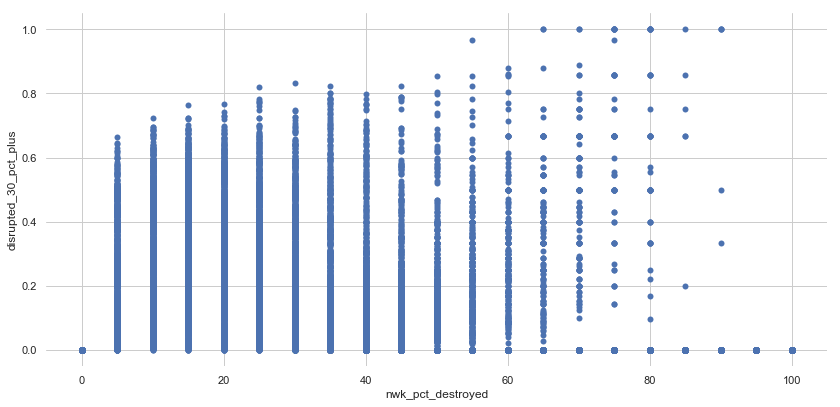

In [62]:
## https://seaborn.pydata.org/examples/different_scatter_variables.html
    
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(14, 6.5))

sns.despine(f, left=True, bottom=True)

sns.scatterplot(x="nwk_pct_destroyed", 
                y="disrupted_30_pct_plus",
                palette="ch:r=-.2,d=.3_r",
                linewidth=0,
                data=df, 
                ax=ax)

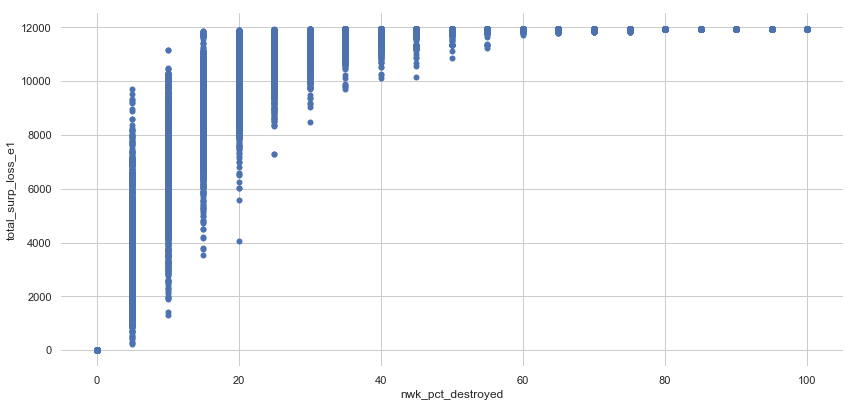

In [76]:
## https://seaborn.pydata.org/examples/different_scatter_variables.html
    
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(14, 6.5))

sns.despine(f, left=True, bottom=True)

sns.scatterplot(x="nwk_pct_destroyed", 
                y="total_surp_loss_e1",
                palette="ch:r=-.2,d=.3_r",
                linewidth=0,
                data=df, 
                ax=ax)

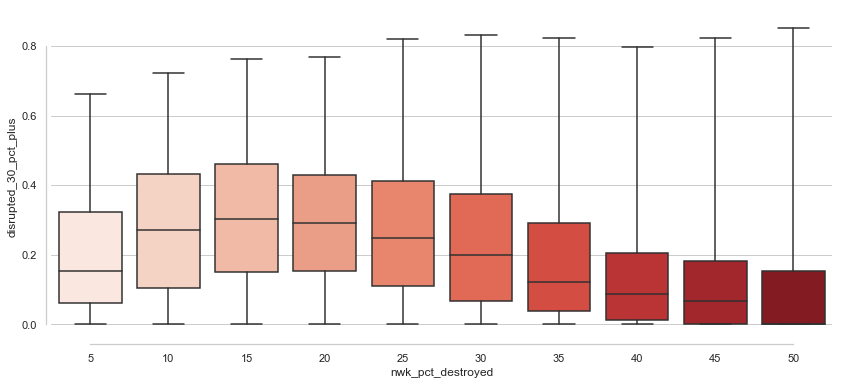

In [60]:
## https://seaborn.pydata.org/examples/grouped_boxplot.html

f, ax = plt.subplots(figsize=(14, 6))

sns.set(style="whitegrid")

data_B = df.loc[(df.nwk_pct_destroyed < 55) & (df.nwk_pct_destroyed > 0)]

sns.boxplot(x = "nwk_pct_destroyed", 
            y = "disrupted_30_pct_plus", 
            data = data_B, 
            whis = 100, 
            palette = 'Reds')

sns.despine(offset=5, trim=True)

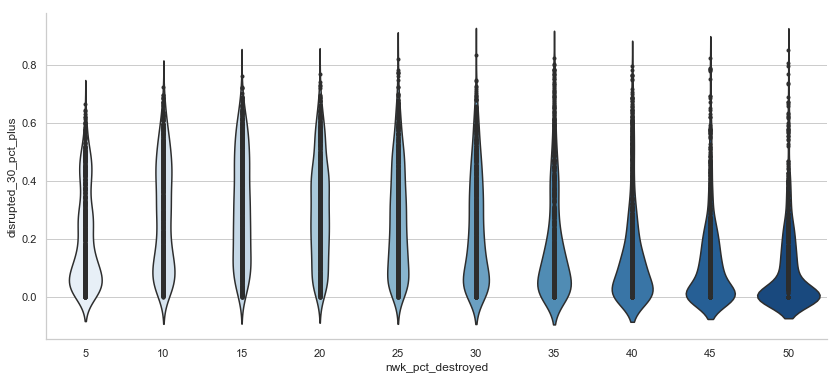

In [70]:
f, ax = plt.subplots(figsize=(14, 6))

sns.set(style="whitegrid")

sns.violinplot(x="nwk_pct_destroyed", 
               y="disrupted_30_pct_plus", 
               data = data_B, 
               palette = "Blues", 
               inner = "point") # or, None, or "box", or "quartile"

sns.despine(left=False)

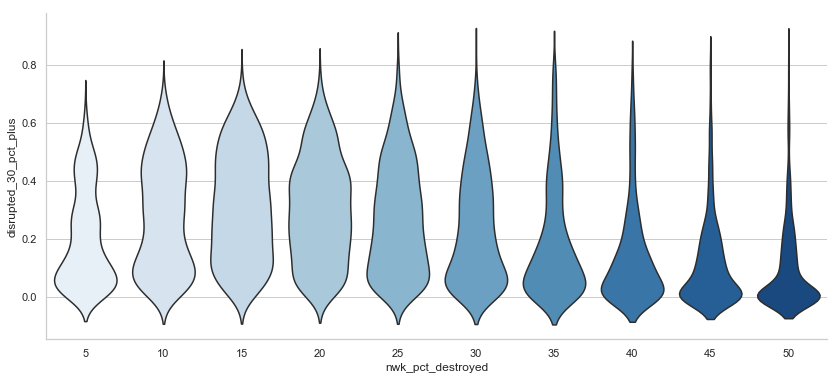

In [96]:
f, ax = plt.subplots(figsize=(14, 6))

sns.set(style="whitegrid")

sns.violinplot(x="nwk_pct_destroyed", 
               y="disrupted_30_pct_plus", #disrupted_30_pct_plus
               data = data_B, 
               palette = "Blues", 
               scale = 'count',
               inner = None) # or, None, or "box", or "quartile"

sns.despine(left=False)

### Examine surplus loss as violin plot

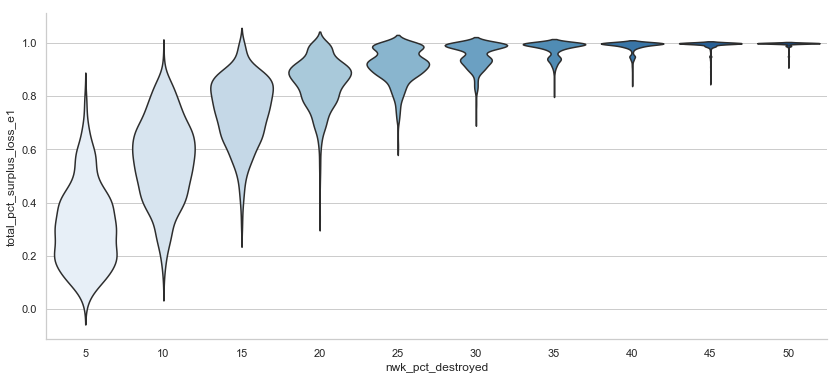

In [94]:
f, ax = plt.subplots(figsize=(14, 6))

sns.set(style="whitegrid")

sns.violinplot(x="nwk_pct_destroyed", 
               y="total_pct_surplus_loss_e1", 
               data = data_B, 
               palette = "Blues", 
               scale = 'count',
               inner = None) # or, None, or "box", or "quartile"

sns.despine(left=False)

In [127]:
data_C_e1 = data_B.copy()
data_C_e1 = data_C_e1[['total_pct_surplus_loss_e1','nwk_pct_destroyed','iteration']]
data_C_e1 = data_C_e1.rename({'total_pct_surplus_loss_e1':'surplus_loss_pct'}, axis = 1)
data_C_e1['elasticity'] = 'e1'

data_C_e2 = data_B.copy()
data_C_e2 = data_C_e2[['total_pct_surplus_loss_e2','nwk_pct_destroyed','iteration']]
data_C_e2 = data_C_e2.rename({'total_pct_surplus_loss_e2':'surplus_loss_pct'}, axis = 1)
data_C_e2['elasticity'] = 'e2'

data_C = pd.concat([data_C_e1,data_C_e2], axis = 0)

### Two series comparison using hue

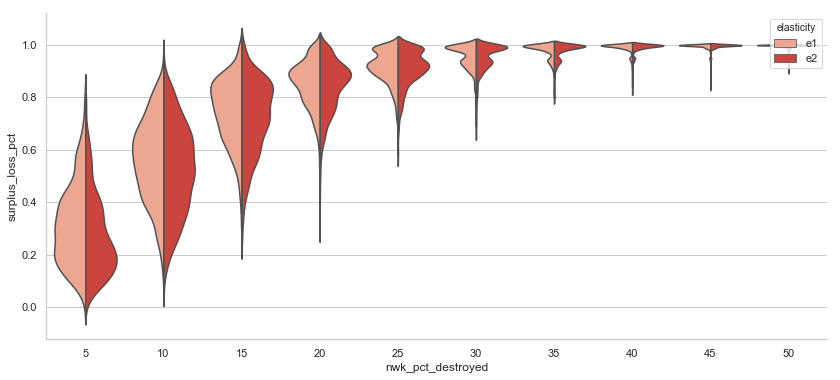

In [136]:
f, ax = plt.subplots(figsize=(14, 6))

sns.set(style="whitegrid")

sns.violinplot(x="nwk_pct_destroyed", 
               y="surplus_loss_pct", 
               hue = 'elasticity',
               data = data_C, 
               palette = "Reds",
               scale = 'count',
               split = True,
               inner = None) # or, None, or "box", or "quartile"

sns.despine(left=False)

In [138]:
# Load the example mpg dataset
mpg = sns.load_dataset("mpg")

mpg.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [155]:
type(mpg)

pandas.core.frame.DataFrame

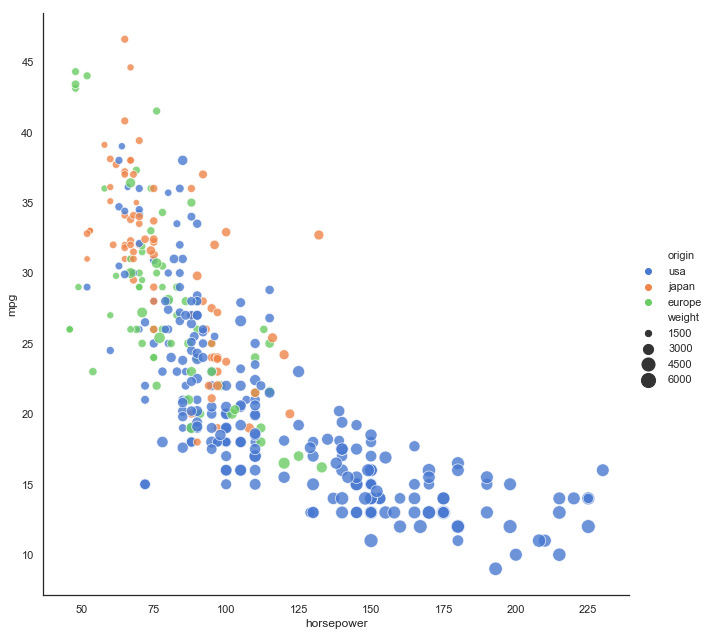

In [147]:
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="horsepower", 
            y="mpg", 
            hue="origin", 
            size="weight",
            sizes=(40, 200), 
            alpha=0.8, 
            palette="muted",
            height = 9, 
            data = mpg)

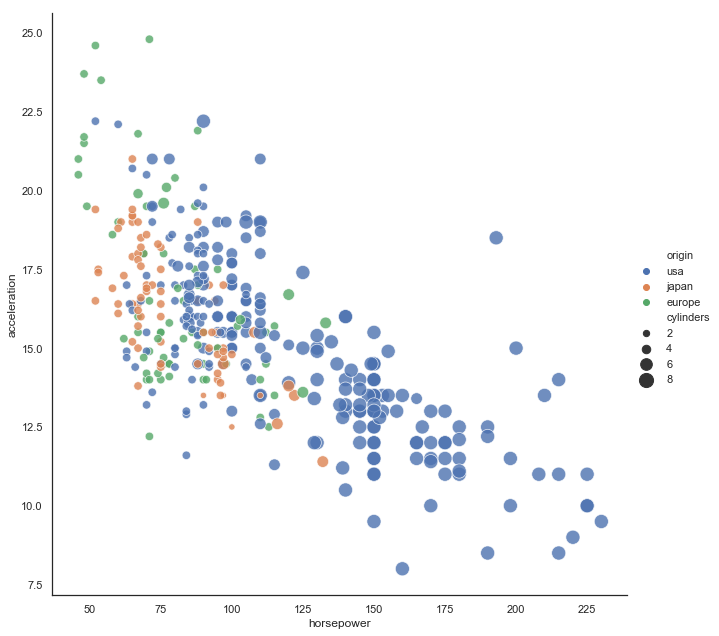

In [154]:
sns.set(style="white")

sns.relplot(x="horsepower", 
            y="acceleration", 
            size="cylinders",
            hue = 'origin',
            sizes=(40, 200), 
            alpha=0.8, 
            height = 9, 
            data = mpg)

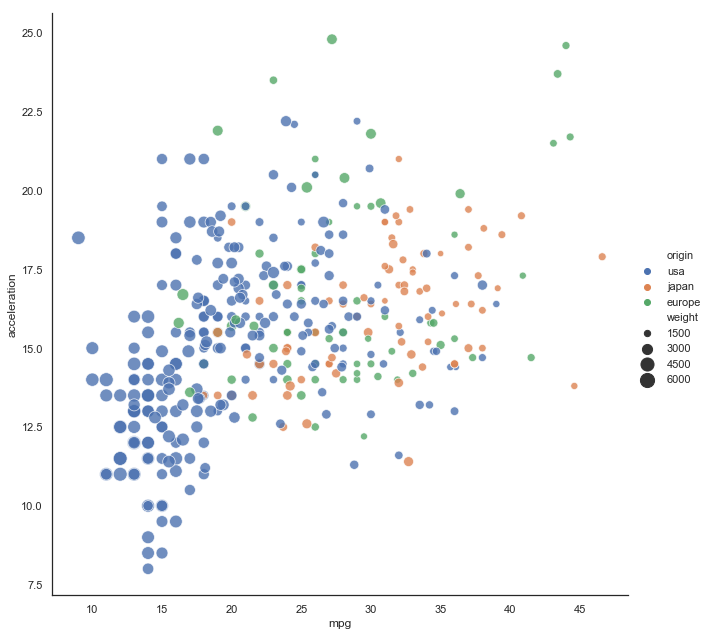

In [159]:
sns.set(style="white")

sns.relplot(x="mpg", 
            y="acceleration", 
            size="weight",
            hue = 'origin',
            sizes=(40, 200), 
            alpha=0.8, 
            height = 9, 
            data = mpg)